# PC LAB1 - Group 4 - Sofia Michael Omar (Yash)

## Download Libraries and download the data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from pandas_datareader import data as pdr
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import scipy
from scipy.optimize import minimize 

In [146]:
df = pd.read_csv("Data_PCLab1_Stock.csv")

## Task 1 : Import the data and describe the sample

In [147]:
df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

### Sort the stock data by date and print the number of stocks

In [148]:
# Sort the stock data by date
df = df.sort_values(by=['Date'])
df.head(5)

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [149]:
# Print the number of stocks
num_stocks = df.shape[1] - 2  
print(f"Number of stocks: {num_stocks}")

Number of stocks: 8


We have 8 different stocks excluding the S&P500.

### Check if the data contains any missing values

In [150]:
# Check if the data contains any missing values
df.isna().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

We have no missing values!

### Average market value of the S&P500

This is the average of the S&P 500 of the whole period.

In [151]:
print(df["sp500"].mean())

2218.7495540592868


To have a better insight we decided to calculate the average for each year. We can notice that the numbers clearly show a steady upward trend in the S&P 500, with only very modest slowdowns.

In [152]:
# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by year and calculate the average of sp500
sp500_yearly_avg = df.groupby(df['Date'].dt.year)['sp500'].mean()
print(sp500_yearly_avg)

Date
2012    1382.140123
2013    1643.798968
2014    1931.376110
2015    2061.067741
2016    2094.651264
2017    2449.076379
2018    2746.214183
2019    2913.356380
2020    3039.293438
Name: sp500, dtype: float64


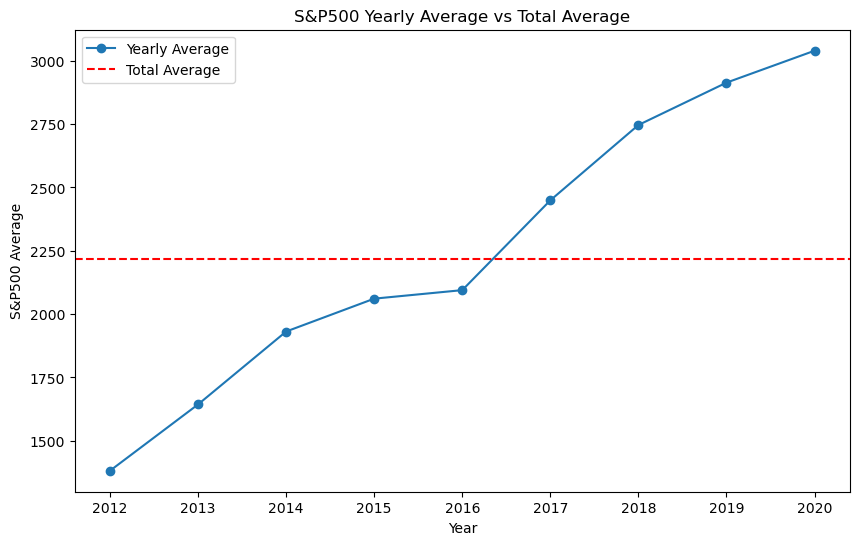

In [153]:
# Plotting the yearly average and total average of the S&P500
plt.figure(figsize=(10, 6))
sp500_yearly_avg.plot(marker='o', label='Yearly Average')
plt.axhline(df["sp500"].mean(), color='red', linestyle='--', label='Total Average')
plt.title('S&P500 Yearly Average vs Total Average')
plt.xlabel('Year')
plt.ylabel('S&P500 Average')
plt.legend()
plt.show()

### Stock or Index with Minimum Dispersion

In [154]:
dispersion = df.drop(columns=['Date']).std()
min_dispersion_column = dispersion.idxmin()
min_dispersion_value = dispersion.min()
print(f"{min_dispersion_column} has the minimum dispersion: {min_dispersion_value:.2f}")

T has the minimum dispersion: 3.21


In [155]:
# Calculated Coefficient of Variation (CV)
columns = df.columns.drop('Date')
cv = df[columns].std() / df[columns].mean()
min_cv_column = cv.idxmin()
min_cv_value = cv.min()
print(f"{min_cv_column} has the minimum Coefficient of Variation: {min_cv_value:.2f}")

T has the minimum Coefficient of Variation: 0.09


Why use the Coefficient of Variation (CV)?

- The raw standard deviation (σ) shows the absolute spread of values, but it does not account for scale.  
  *Example: a $2 volatility is very large for a $5 stock but negligible for a $500 stock.*  

- To make volatility comparable across securities with different price levels, we use the **Coefficient of Variation**:  

  $$
  CV = \frac{\sigma}{\text{mean}}
  $$

- **Interpretation**:  
  - **Low CV** → the security is relatively stable per unit of price/expected return (low relative volatility).  
  - **High CV** → the security fluctuates strongly compared to its average level (high relative volatility).  

In this analysis, the stock/index with the **lowest CV** is considered the most *stable* in relative terms.


In [156]:
df

Date        AAPL          BA          T        MGM         AMZN  \
0    2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1    2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2    2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3    2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4    2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...         ...         ...         ...        ...        ...          ...   
2154 2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155 2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156 2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157 2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158 2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

### Maximum Price Amazon

In [157]:
# Calculate the maximum price of Amazon (AMZN)
max_amazon_price = df['AMZN'].max()
print(f"The maximum price of Amazon (AMZN) is: {max_amazon_price:.2f}")

The maximum price of Amazon (AMZN) is: 3225.00


In [158]:
# Find the date when Amazon (AMZN) had its maximum price
max_amazon_date = df.loc[df['AMZN'].idxmax(), 'Date']
print(f"The maximum price of Amazon (AMZN) was on: {max_amazon_date.date()}")

The maximum price of Amazon (AMZN) was on: 2020-08-06


In mid-2020, stock markets surged after the COVID-19 crash (March 2020), especially in tech companies like Amazon, which benefited from increased online shopping, cloud services (AWS), and digital consumption during lockdowns.
The August 2020 peak reflects both investor optimism and the strong pandemic-driven demand for Amazon’s business model.

AAPL     455.609985
BA       440.619995
T         43.470001
MGM       38.029999
AMZN    3225.000000
IBM      215.800003
TSLA    1643.000000
GOOG    1568.489990
dtype: float64


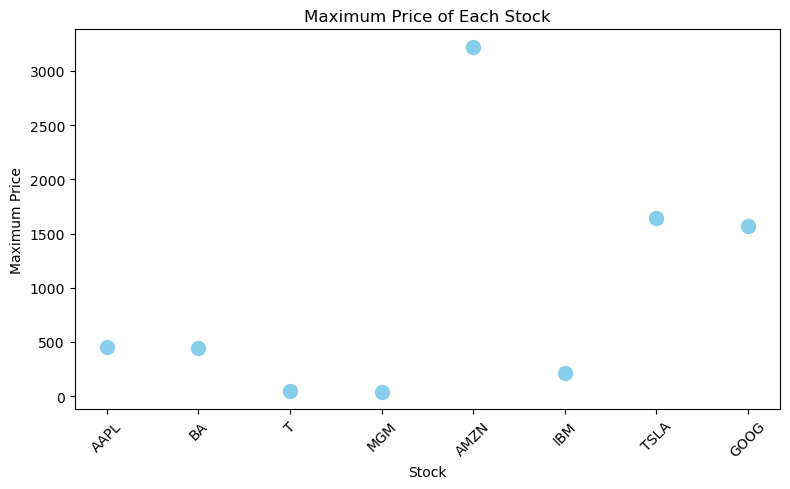

In [159]:
# Get the maximum price of all stocks except 'sp500'
max_prices = df.drop(columns=['Date', 'sp500']).max()

# Print the maximum prices
print(max_prices)

# Plot the maximum prices
plt.figure(figsize=(8, 5))
plt.scatter(max_prices.index, max_prices.values, color='skyblue', s=100)
plt.title('Maximum Price of Each Stock')
plt.ylabel('Maximum Price')
plt.xlabel('Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Task 2 : Plot the data

### Plot the data

In [160]:
def plot_not_normalized(df: pd.DataFrame) -> None:
    """
    This function plots the stock prices over time without normalisation.
    """
    df.plot(x='Date')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Prices Over Time (without Normalisation)')
    plt.show()

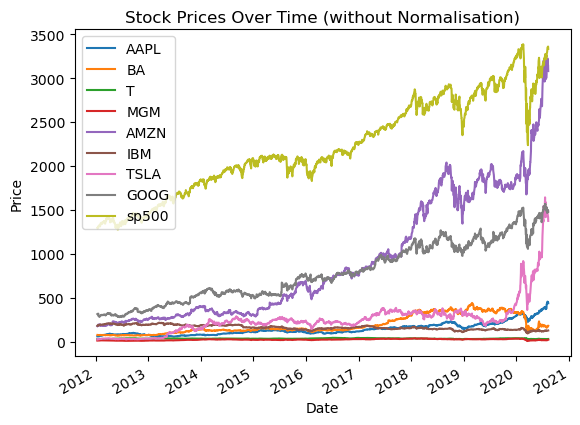

In [161]:
plot_not_normalized(df)

Interpretation of the Non-Normalized Stock Price Graph

1. **Scale dominates the comparison**  
   - Amazon (AMZN, purple) and Google (GOOG, gray) appear much higher than other stocks because their absolute prices are in the hundreds/thousands of dollars.  
   - The S&P 500 index (yellow-green) also sits at a high level because it’s a broad market index with its own scale.  
   - Stocks like MGM, T, BA, and IBM look almost flat — not because they didn’t move, but because their absolute price levels are much lower.

2. **Key observations**  
   - **AMZN** shows a very strong upward trajectory, especially after 2015, peaking sharply into 2020.  
   - **TSLA** (pink) looks relatively low until ~2019, then surges dramatically, reflecting Tesla’s explosive growth phase.  
   - **GOOG** grows steadily but less explosively than AMZN or TSLA.  
   - **IBM** (brown) stays flat and even slightly declining, reflecting stagnation in that period.  
   - **S&P 500** rises steadily over the decade, capturing the overall bull market.


## Task 3 : Print out normalized (scaled) stock prices

- The **Baseline Normalized graph** best shows relative growth performance — which stocks were winners and which lagged. (- Example: TSLA grew ~60×, AMZN ~18×, while IBM stayed flat.) 
- The **Log-Return graph** confirms the same story but in a more technical, finance-oriented form (Useful in **financial modeling** and risk/return analysis, but less intuitive than the baseline version for a general audience).  
- Compared to the **Non-Normalized graph**, both normalized versions reveal the **true relative performance** (e.g., IBM stagnation, Tesla’s explosive growth) that raw prices completely obscure.

### Baseline Normalization (divide by first price)

In [162]:
def plot_normalized_base(df: pd.DataFrame) -> None:
    """
    Plot stock prices normalized to their first available value.
    Each stock starts at 1 on the initial date, showing relative growth.
    """
    normalized = df.copy()
    for col in df.columns:
        if col != 'Date':
            normalized[col] = df[col] / df[col].iloc[0]

    normalized.plot(x='Date')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Base = 1)')
    plt.title('Stock Prices Over Time (Baseline Normalization)')
    plt.show()

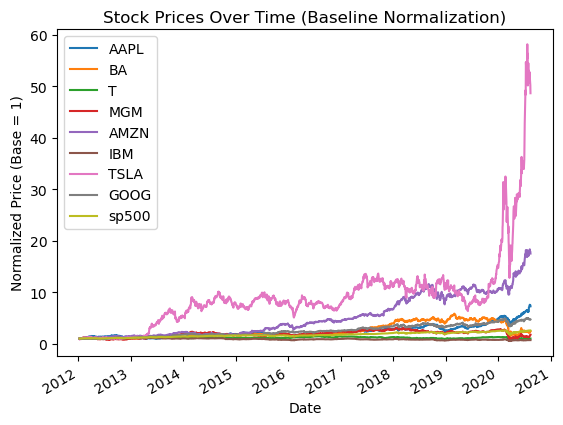

In [163]:
plot_normalized_base(df)

- Each stock is divided by its value on the **first date** in the dataset.  
- All stocks start at **1**, so the plot shows **relative percentage growth**.  
- Example: A line going from 1 → 3 means the stock tripled.  

It directly compares **growth trajectories** across stocks.


### Log-Return Normalization Plot

In [164]:
def plot_normalized_logreturns(df: pd.DataFrame) -> None:
    """
    Plot stock prices normalized using cumulative log returns:
        R_t = ln(P_t / P_(t-1))
    Transforms prices into compounded growth factors.
    """
    normalized = pd.DataFrame()
    normalized['Date'] = df['Date']

    for col in df.columns:
        if col != 'Date':
            log_returns = np.log(df[col] / df[col].shift(1))
            cumulative = log_returns.cumsum().apply(np.exp)
            normalized[col] = cumulative

    normalized.plot(x='Date')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Growth (Log Returns)')
    plt.title('Stock Prices Over Time (Log-Return Normalization)')
    plt.show()

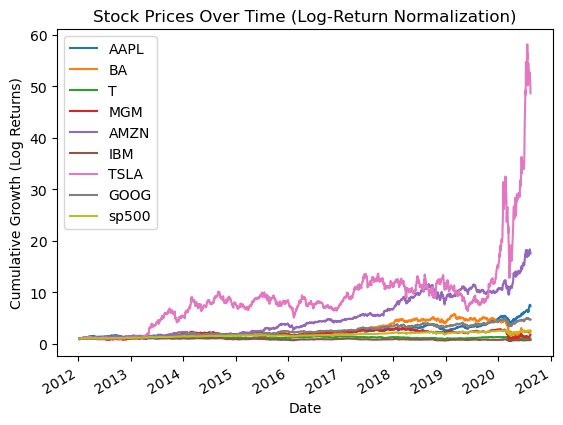

In [165]:
plot_normalized_logreturns(df)

- Prices are transformed into **log returns**:  
  $$
  R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
  $$
- These are compounded to show normalized **cumulative growth** over time.  
- This method avoids distortions from large nominal price differences.  

It analyses **compounded percentage growth** consistently over time.


### Non-Normalized Graph (absolute prices)
- Shows raw stock prices over time.
- High-priced stocks (AMZN, GOOG, S&P 500) dominate visually.
- Lower-priced stocks (MGM, T, IBM) appear nearly flat, even if they delivered sizable percentage gains.
- Example: TSLA looks modest until 2019 because its nominal price was low, which masks its explosive percentage growth.

### Baseline Normalized Graph (all start at 1 in 2012)
- Puts all stocks on the same footing: $1 invested in 2012 → value today.
- Reveals true relative growth:
  - TSLA: biggest winner (~60× growth).
  - AMZN: strong growth (~18×).
  - AAPL and GOOG: solid, steadier growth.
  - IBM: essentially flat → underperformance.
  - S&P 500: steady benchmark rise (~3×).
- Best for comparing investment performance across different stocks.

### Summary
The non-normalized chart reflects nominal price levels and can mislead cross-stock comparisons by letting high-priced shares dominate. The baseline normalized chart re-scales each series to a common starting point, making percentage performance directly comparable; it is the appropriate choice when the goal is to assess which stocks outperformed or lagged over the period.


## Task 3 : Optional

Interactive line plot of stock prices using Plotly Express

In [166]:
# --- Normalization helpers ---
def normalize_base(df: pd.DataFrame) -> pd.DataFrame:
    normalized = df.copy()
    for col in df.columns:
        if col != 'Date':
            normalized[col] = df[col] / df[col].iloc[0]
    return normalized

def normalize_logreturns(df: pd.DataFrame) -> pd.DataFrame:
    normalized = pd.DataFrame()
    normalized['Date'] = df['Date']
    for col in df.columns:
        if col != 'Date':
            log_returns = np.log(df[col] / df[col].shift(1))
            cumulative = log_returns.cumsum().apply(np.exp)
            normalized[col] = cumulative
    return normalized

# --- Interactive plot with dropdown ---
def plot_interactive_with_modes(df: pd.DataFrame) -> None:
    """
    Interactive stock plot with dropdown menu to switch between:
    - Non-normalized
    - Baseline normalized
    - Log-return normalized
    """

    # Precompute all datasets
    datasets = {
        "Non-Normalized": df,
        "Baseline Normalized": normalize_base(df),
        "Log-Return Normalized": normalize_logreturns(df)
    }

    # Melt each dataset for Plotly
    melted_data = {
        name: data.melt(id_vars='Date', var_name='Stock', value_name='Value')
        for name, data in datasets.items()
    }

    # Start with non-normalized view
    fig = px.line(
        melted_data["Non-Normalized"],
        x="Date", y="Value", color="Stock",
        title="Interactive Stock Prices"
    )

    # Add other views as traces but set them invisible initially
    for name, data in melted_data.items():
        if name == "Non-Normalized":
            continue
        fig.add_traces(px.line(data, x="Date", y="Value", color="Stock").data)

    # Create dropdown menu
    n_stocks = df.shape[1] - 1  # excluding 'Date'
    visibility = []

    # Each view corresponds to one set of stock traces
    for i, name in enumerate(datasets.keys()):
        vis = [False] * (len(datasets) * n_stocks)
        for j in range(n_stocks):
            vis[i * n_stocks + j] = True
        visibility.append(vis)

    # Add dropdown to layout
    fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=[
                    dict(label=name,
                         method="update",
                         args=[{"visible": visibility[i]},
                               {"title": f"Interactive Stock Prices ({name})"}])
                    for i, name in enumerate(datasets.keys())
                ],
                x=0.01, y=1.15,
                xanchor="left", yanchor="top"
            )
        ],
        template="plotly_white",
        hovermode="x unified",
        legend_title_text="Stocks"
    )

    fig.show()


In [167]:
# Call the interactive plot function
plot_interactive_with_modes(df)

## Task 5 : Calculate stock returns

### Stocks daily returns

In [168]:
# A function to calculate daily returns for all stocks in the DataFrame.

def calculate_daily_returns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate daily returns for all stocks in the DataFrame.
    """
    returns_df = df.copy()
    for col in df.columns:
        if col != 'Date':
            # Daily return = (P_t / P_(t-1) - 1) * 100
            returns_df[col] = df[col].pct_change() * 100
            #returns_df[col] = (df[col] / df[col].shift(1) - 1) * 100
    return returns_df


With this plot:
- Each stock gets its own subplot → no clutter.
- We can clearly see spikes (crashes, rallies) stock by stock.
- Easy to compare volatility patterns.

In [169]:
def plot_daily_returns(returns_df: pd.DataFrame) -> None:
    """
    Plot daily returns for each stock in separate subplots.
    """
    stocks = [col for col in returns_df.columns if col != 'Date']
    n_stocks = len(stocks)

    # Create subplots grid
    fig, axes = plt.subplots(n_stocks, 1, figsize=(12, 3*n_stocks), sharex=True)
    
    # If only one stock, axes is not iterable
    if n_stocks == 1:
        axes = [axes]

    for ax, stock in zip(axes, stocks):
        ax.plot(returns_df['Date'], returns_df[stock], label=stock, color='steelblue')
        ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # reference line
        ax.set_ylabel("Daily Return (%)")
        ax.set_title(f"Daily Returns of {stock}")
        ax.legend(loc="upper right")

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()


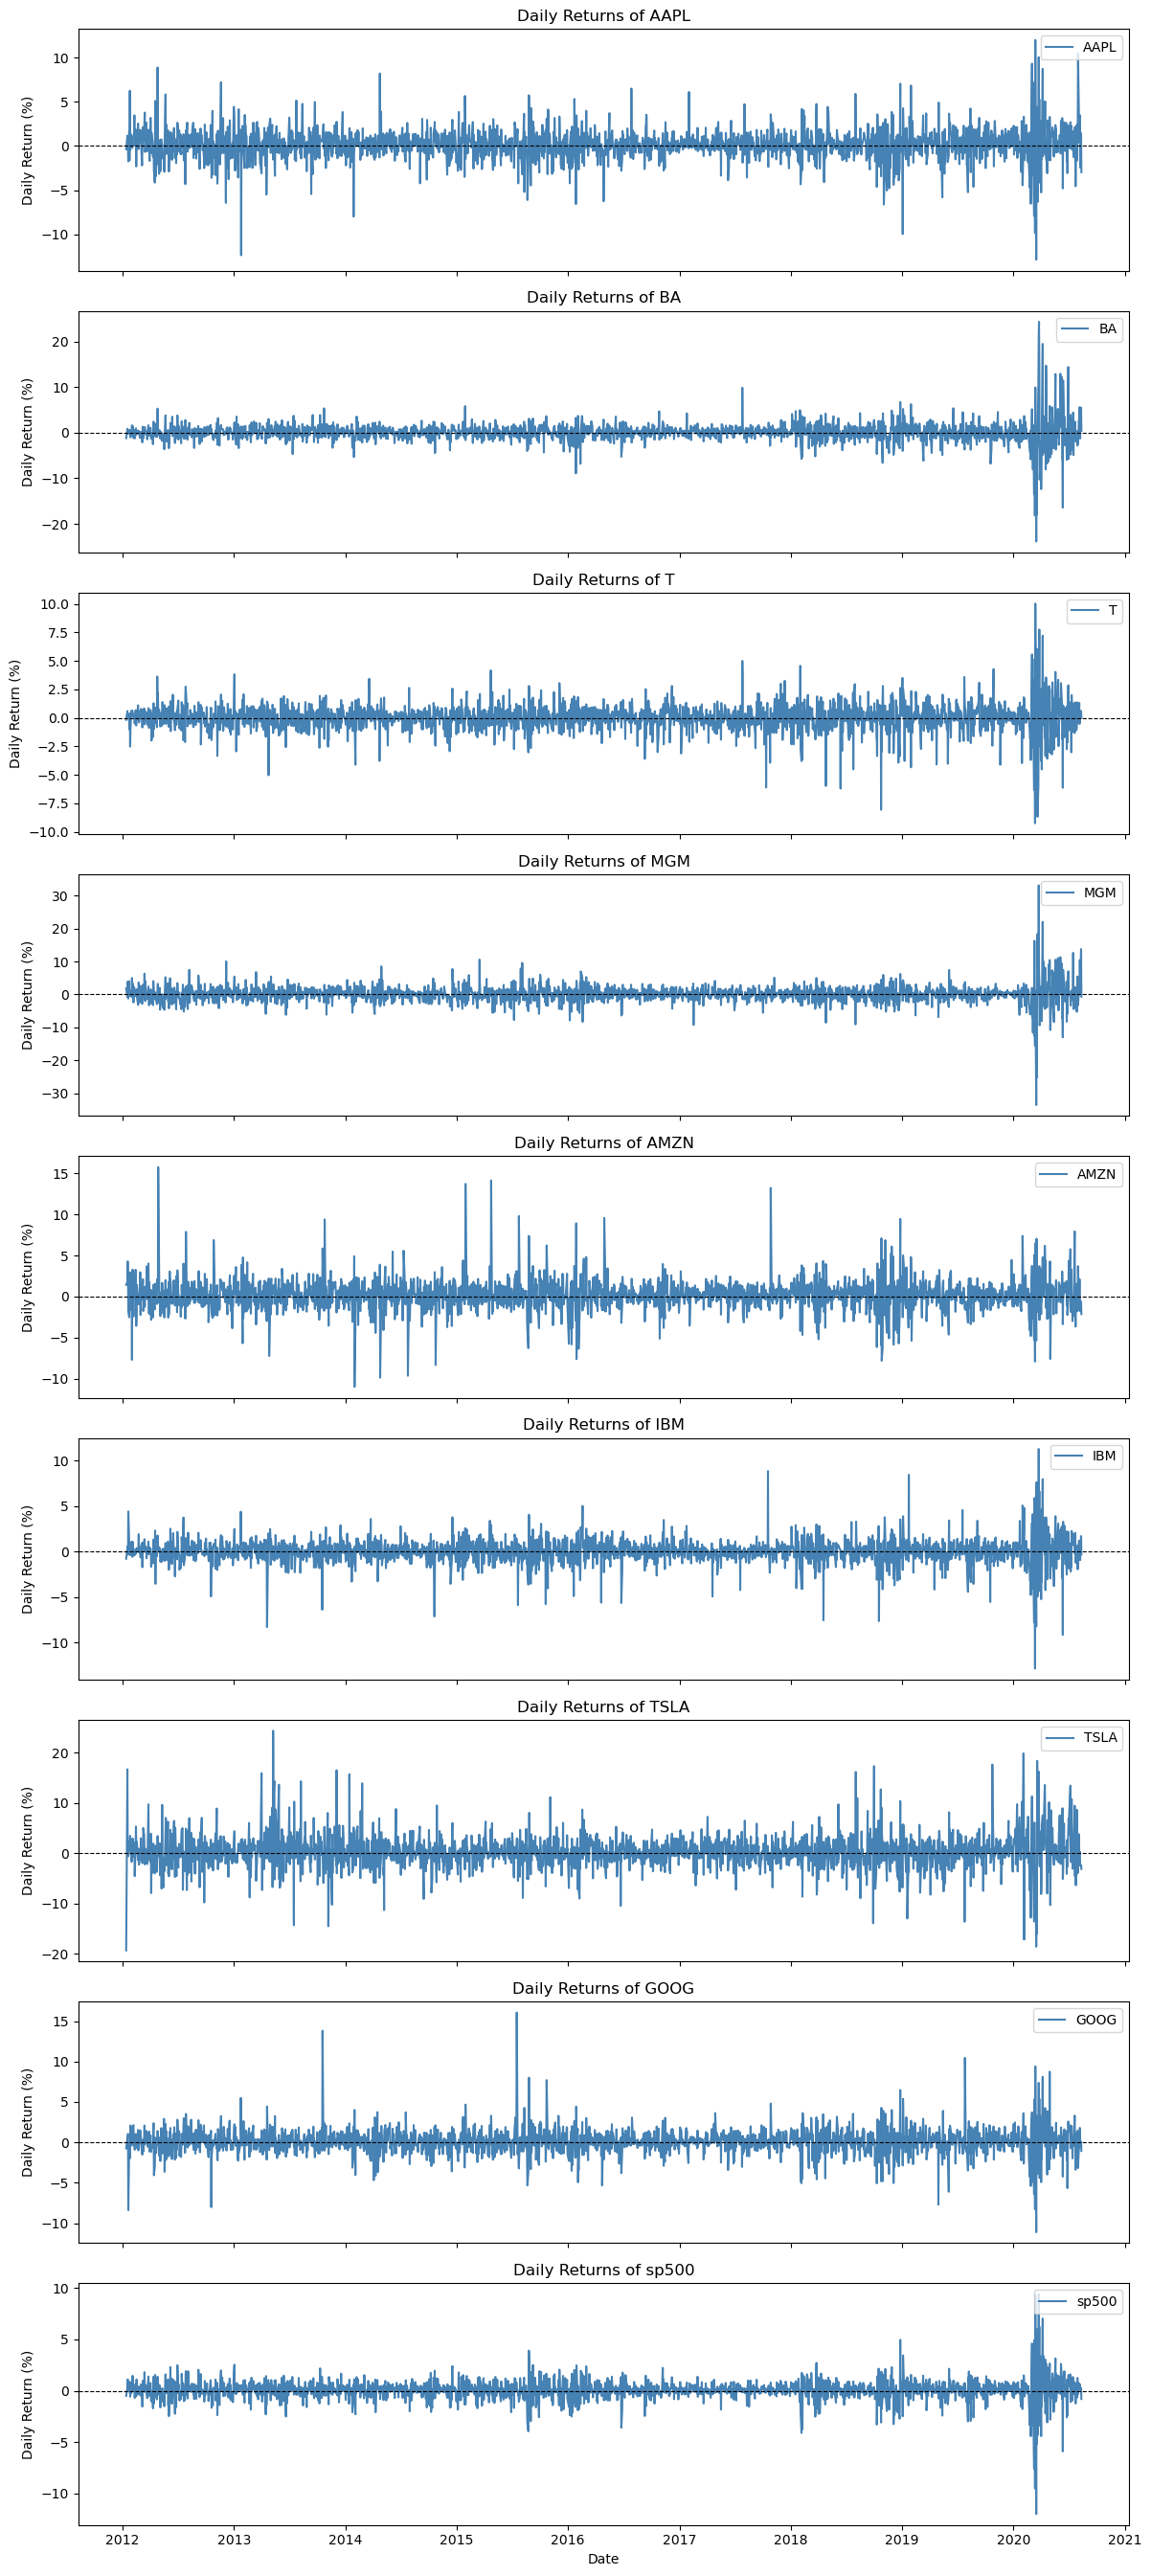

In [170]:
# Calculate daily returns
returns_df = calculate_daily_returns(df)

# Plot them cleanly in subplots
plot_daily_returns(returns_df)


The time-series line plots of daily returns show **when volatility spikes occurred**, but they can be very noisy.  
To gain deeper insights, we complement them with:

- **Histograms** → reveal the overall distribution of returns (center, spread, tails).  
- **Boxplots** → allow direct comparison of volatility across all stocks.  
- **Rolling Volatility Plots** → show how risk evolves over time (e.g., during crises).  

This combination provides not only a view of volatility over time but also the **magnitude, distribution, and changes in risk** across different stocks.


In [171]:
def plot_return_histograms(returns_df: pd.DataFrame, bins: int = 50) -> None:
    """
    Plot histograms of daily returns for each stock.
    """
    stocks = [col for col in returns_df.columns if col != 'Date']
    n_stocks = len(stocks)

    fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 3*n_stocks), sharex=True)

    if n_stocks == 1:
        axes = [axes]

    for ax, stock in zip(axes, stocks):
        ax.hist(returns_df[stock].dropna(), bins=bins, color='steelblue', alpha=0.7)
        ax.set_title(f"Histogram of Daily Returns - {stock}")
        ax.set_xlabel("Daily Return (%)")
        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


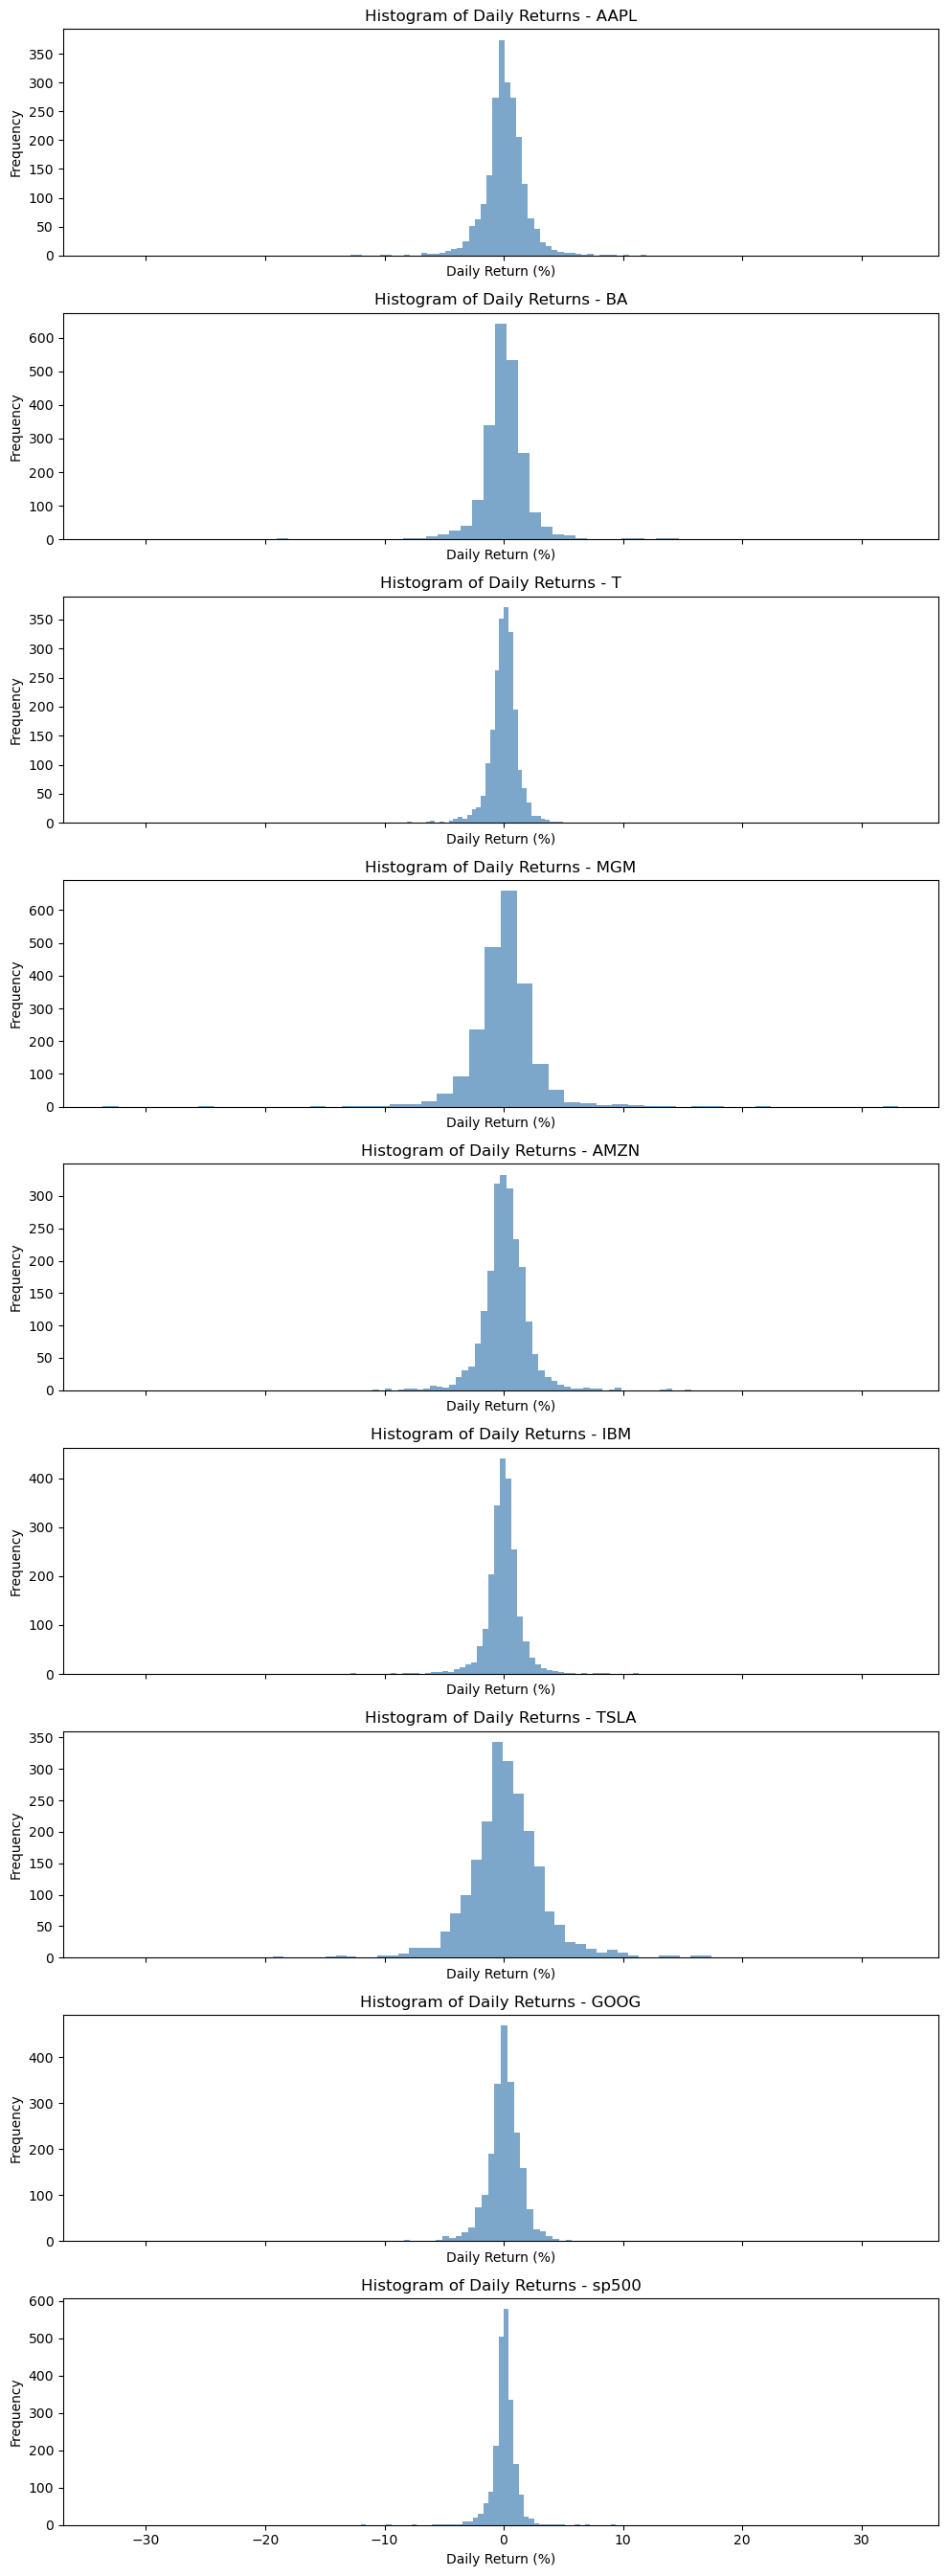

In [172]:
plot_return_histograms(returns_df)

In [173]:
def plot_return_boxplots(returns_df: pd.DataFrame) -> None:
    """
    Plot boxplots of daily returns for all stocks side by side.
    """
    stocks = [col for col in returns_df.columns if col != 'Date']

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.boxplot([returns_df[stock].dropna() for stock in stocks], labels=stocks)
    ax.set_title("Boxplot of Daily Returns for All Stocks")
    ax.set_ylabel("Daily Return (%)")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/var/folders/x4/7vf731f159n349vn3wlmypn00000gn/T/ipykernel_98151/3481329426.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



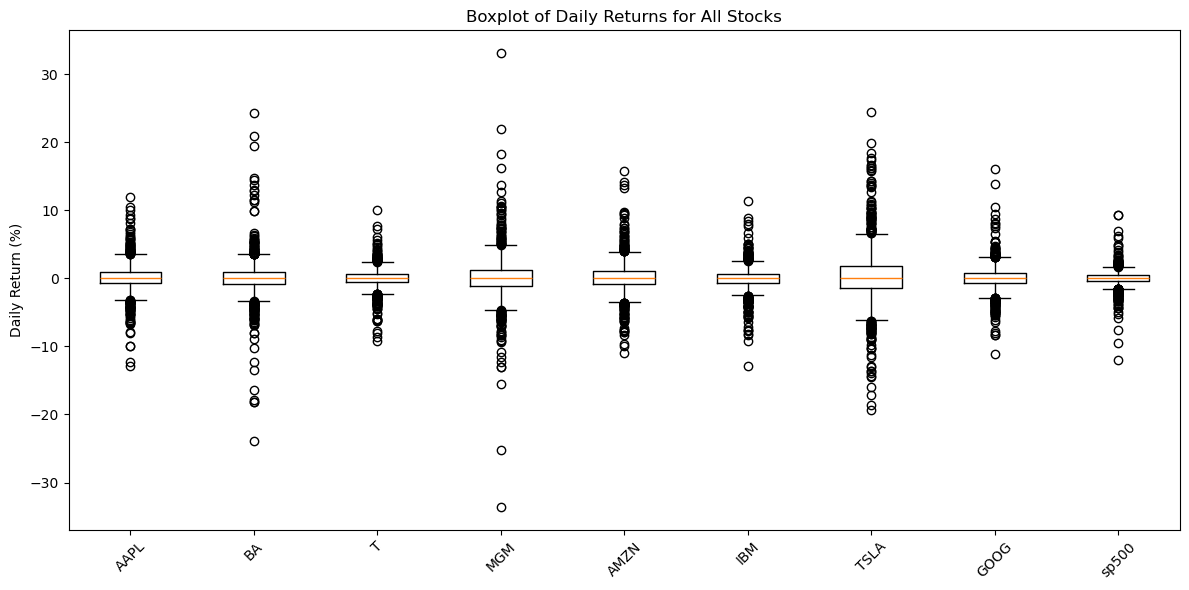

In [174]:
plot_return_boxplots(returns_df)

In [175]:
def plot_rolling_volatility(returns_df: pd.DataFrame, window: int = 30) -> None:
    """
    Plot rolling volatility (standard deviation) of daily returns.
    """
    stocks = [col for col in returns_df.columns if col != 'Date']
    fig, ax = plt.subplots(figsize=(12, 6))

    for stock in stocks:
        ax.plot(
            returns_df['Date'],
            returns_df[stock].rolling(window).std(),
            label=stock
        )

    ax.set_title(f"{window}-Day Rolling Volatility of Daily Returns")
    ax.set_xlabel("Date")
    ax.set_ylabel("Volatility (std of daily returns)")
    ax.legend(loc="upper left", ncol=3)

    plt.tight_layout()
    plt.show()


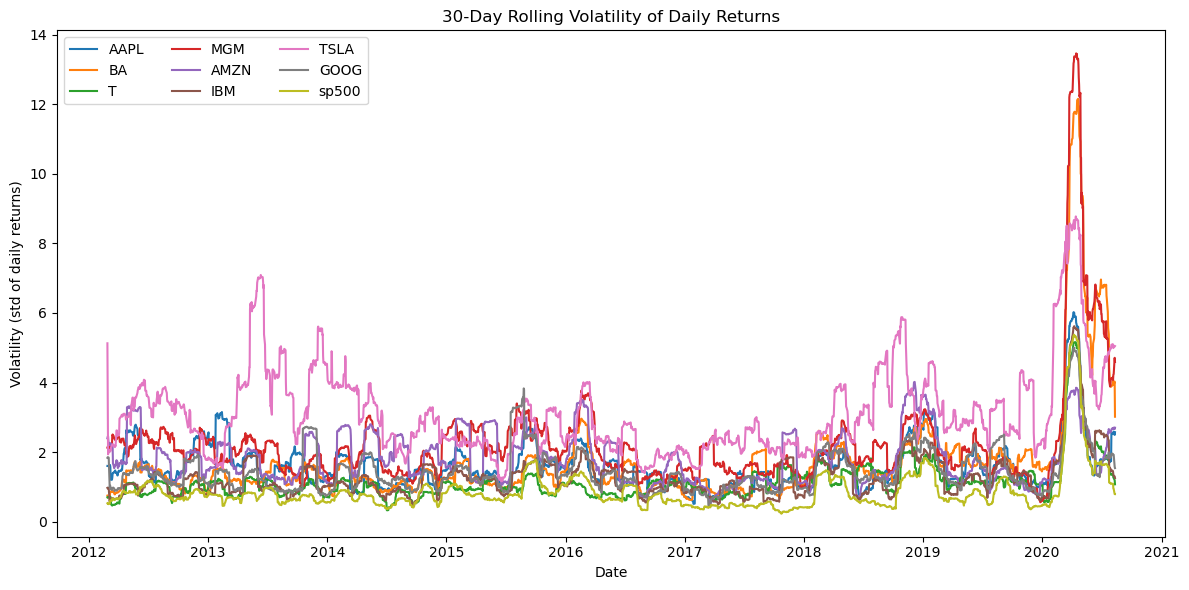

In [176]:
plot_rolling_volatility(returns_df)

We plotted daily returns using different visualizations to capture not only the timing of volatility but also its magnitude, distribution, and evolution.

---

1. Time-Series Line Plots (Daily Returns per Stock)
- Show **when volatility spikes occurred**.
- Clear patterns:
  - **All stocks** experience a huge increase in volatility around early 2020 (COVID-19 shock).
  - **TSLA** shows frequent large swings, confirming it is one of the most volatile stocks.
  - **IBM** and **T** remain relatively stable compared to others.
- Financial insight: These plots reveal **crisis periods** and the stocks that tend to be more turbulent in daily trading.

---

2. Histograms of Daily Returns
- Show the **distribution of returns**.
- Most stocks’ returns cluster tightly around zero, with long tails.
- **TSLA** and **MGM** have much wider distributions → higher probability of extreme gains/losses.
- **S&P 500** has the narrowest distribution → diversified index smooths volatility.
- Financial insight: These distributions highlight **fat tails** and the risk of extreme events (important for risk management and VaR analysis).

---

3. Boxplots of Daily Returns
- Allow **side-by-side comparison** of volatility.
- **TSLA** stands out with the widest interquartile range and many extreme outliers.
- **MGM** and **BA** also show wide ranges, reflecting exposure to cyclical industries.
- **T** and **IBM** show the smallest boxes → more stable, defensive stocks.
- Financial insight: Boxplots summarize volatility and riskiness per stock; growth stocks like Tesla are riskier, while defensive stocks like telecom/utilities are steadier.

---

4. Rolling Volatility (30-Day Standard Deviation)
- Shows **how volatility changes over time**.
- Clear spike across all stocks in early 2020 (pandemic).
- **TSLA** maintains elevated volatility throughout, not just in crises.
- **S&P 500** remains smoother, though even the index peaked strongly during COVID.
- Financial insight: Rolling volatility captures **changing market risk** and highlights periods when portfolios need tighter risk control.

---

Summary
- **TSLA**: Highest volatility, wide distribution, many outliers → high risk/high reward.  
- **MGM & BA**: More cyclical, volatile in crises.  
- **IBM & T**: Defensive, relatively stable.  
- **S&P 500**: Diversified, lowest volatility, useful as a benchmark.  

Combining all four views gives a complete picture:
- *When* volatility happens (time-series).  
- *How big* it is (histograms & boxplots).  
- *How it evolves* (rolling volatility).  


### The correlations between daily returns

In [177]:
import pandas as pd

def compute_return_correlations(returns_df: pd.DataFrame, method: str = "pearson") -> pd.DataFrame:
    """
    Compute the Symmetric correlation matrix indexed/columned by stock tickers.
    
    Correlation method to use (default: Pearson).
    """
    num = returns_df.drop(columns=["Date"], errors="ignore")
    return num.corr(method=method)


### The correlation table as in heat-map

In [178]:
def plot_correlation_heatmap(*, corr: pd.DataFrame = None,
                             returns_df: pd.DataFrame = None,
                             method: str = "pearson",
                             title: str = None) -> None:
    """
    Plot a correlation matrix as a heatmap.

    Provide EITHER `corr` (precomputed) OR `returns_df` (+ optional `method`).
    """
    if corr is None:
        if returns_df is None:
            raise ValueError("Provide either `corr` or `returns_df`.")
        corr = compute_return_correlations(returns_df, method=method)
        if title is None:
            title = f"Correlation of Daily Returns ({method.capitalize()})"
    else:
        if title is None:
            title = "Correlation of Daily Returns"

    # --- plotting ---
    fig, ax = plt.subplots(figsize=(9, 7))
    im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")

    labels = list(corr.columns)
    ax.set_xticks(np.arange(len(labels))); ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right"); ax.set_yticklabels(labels)
    ax.set_title(title)

    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center", fontsize=8)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Correlation", rotation=270, labelpad=12)

    plt.tight_layout()
    plt.show()

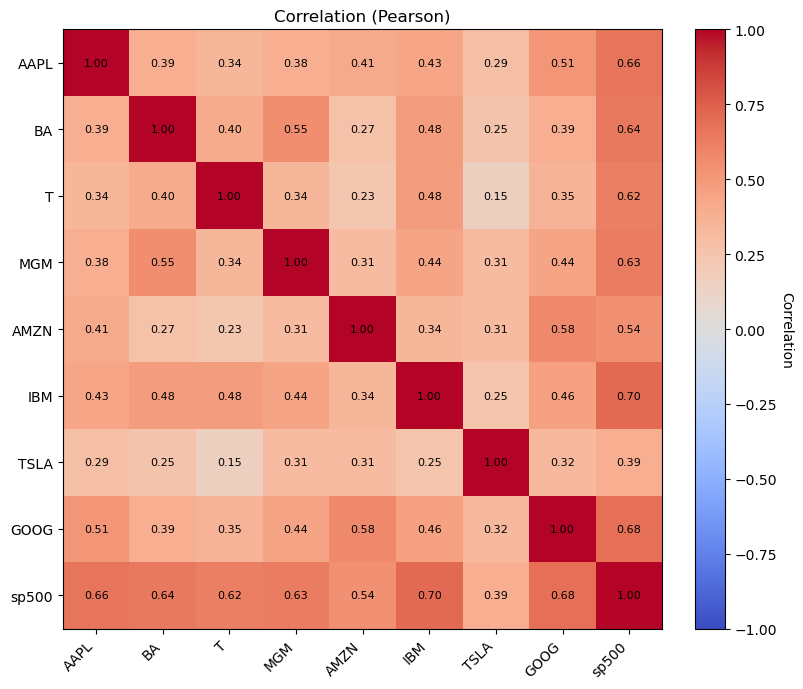

In [179]:
corr = compute_return_correlations(returns_df, method="pearson")
plot_correlation_heatmap(corr=corr, title="Correlation (Pearson)")


1. **High correlations with the S&P 500**  
   - Most stocks show strong positive correlations with the index: IBM (0.70), GOOG (0.68), AAPL (0.66), BA (0.64).  
   - This confirms that these stocks are large-cap, market-driven names whose performance is strongly linked to broader market movements.  
   - During market stress, these correlations often increase further, reducing diversification benefits.

2. **Moderate to low correlations among individual stocks**  
   - Some pairs show weaker correlations (e.g., TSLA with T = 0.15, TSLA with AMZN = 0.31).  
   - Tesla stands out as being more idiosyncratic — its earlier volatility and explosive growth were more **stock-specific** than broad market-driven.  
   - Telecom (T) also shows relatively weak links to other equities, reflecting its more defensive profile.

3. **Sector and cyclical effects**  
   - MGM and BA are more correlated with each other (0.55), consistent with cyclical, discretionary industries exposed to macroeconomic conditions.  
   - Tech giants (GOOG, AAPL, AMZN) cluster together, sharing both growth dynamics and market sensitivity.

4. **Link to volatility analysis**  
   - From the volatility plots, TSLA and MGM had the widest swings; here, their correlations are lower, meaning those swings were more **idiosyncratic risk**.  
   - More stable names like IBM and T show lower volatility but higher correlation with the S&P 500 — they move with the market, but with smaller swings.

5. **Portfolio perspective**: Mixing defensive (T, IBM), high-growth (TSLA, AMZN), and market-sensitive tech (AAPL, GOOG) can balance risk/return, but true diversification requires exposure to assets outside highly correlated equities.  


### The top 2 stocks that are positively correlated with the S&P500

In [180]:
# Find the two stocks with the highest correlation to sp500 (excluding sp500 itself)
sp500_corr = corr["sp500"].drop("sp500")
top2_corr = sp500_corr.sort_values(ascending=False).head(2)
print("Top 2 stocks most correlated with S&P500:")
for stock, value in top2_corr.items():
    print(f"{stock}: {value:.2f}")

Top 2 stocks most correlated with S&P500:
IBM: 0.70
GOOG: 0.68


Linked to what written before, the 2 stocks that are positively correlated with the S&P500 are IBM (~0.70) and GOOG (~0.68).

### The correlation between Amazon and Boeing

In [181]:
# Correlation between Amazon (AMZN) and Boeing (BA)
amzn_ba_corr = corr.loc["AMZN", "BA"]
print(f"Correlation between Amazon (AMZN) and Boeing (BA): {amzn_ba_corr:.2f}")

Correlation between Amazon (AMZN) and Boeing (BA): 0.27


### The correlation between MGM and Boeing

In [182]:
# Correlation between MGM and Boeing (BA)
amzn_ba_corr = corr.loc["MGM", "BA"]
print(f"Correlation between MGM and Boeing (BA): {amzn_ba_corr:.2f}")

Correlation between MGM and Boeing (BA): 0.55


From the above correlation values, we can see that Boeing's correlation with Amazon at 0.27 is comparitavely low, whereas Boeing's correlation with MGM is twice as much at 0.55, placing it on the higher end of the range. 

This difference in correlation can possibly be attributed to the nature of the industries and their response and sensitivity to economic cycles. MGM, with a focus on entertainment and hospitality, tends to be more cyclical and sensitive to economic conditions, similar to Boeing, which is heavily influenced by the health of the global economy and travel demand. On the other hand, Amazon operates in the e-commerce and cloud computing sectors, which have shown more resilience and even growth during economic downturns, such as the COVID-19 pandemic.

### Historgrams of Daily Returns

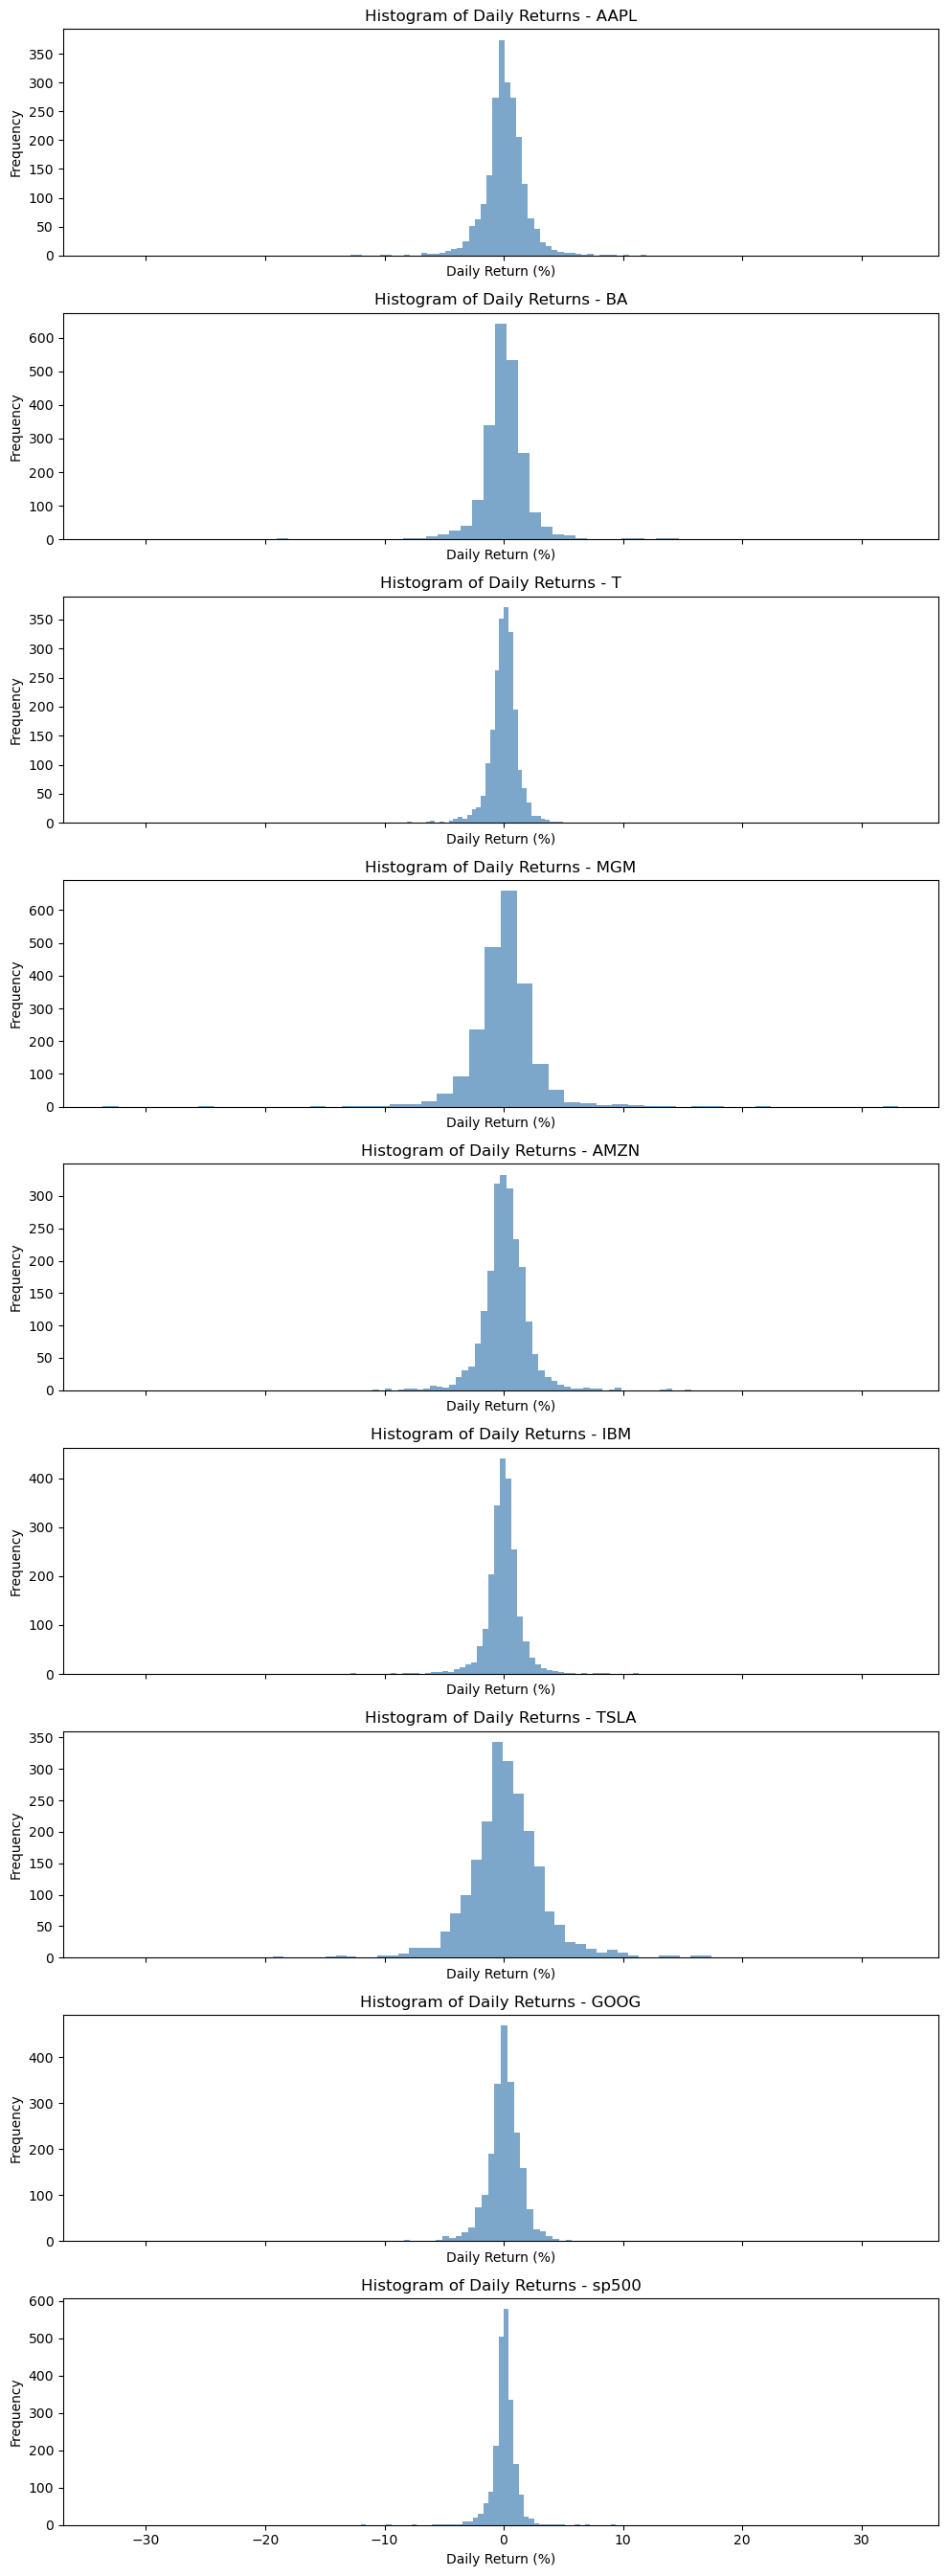

In [183]:
plot_return_histograms(returns_df)

Most stocks have returns clustered tightly around zero, indicating that small daily changes are most common. TSLA and MGM display much wider distributions, with longer tails, reflecting higher volatility and a greater likelihood of extreme gains or losses. S&P 500 shows the narrowest distribution, consistent with diversification thoery, given it's low risk nature. 

Overall, these histograms provide a visual summary of each stock’s risk and the frequency of large price swings, which is crucial for portfolio construction and risk management.

In [184]:
def plot_interactive_histograms(returns_df, default_selection=("sp500",), bin_size=0.2):
    """
    Plot interactive histograms of daily returns for each column in returns_df (except 'Date'),
    starting with only the series in default_selection visible.
    
    Legend acts like checkboxes: click to toggle visibility, double-click to isolate one.
    
    Parameters
    ----------
    returns_df : pd.DataFrame
        DataFrame with columns of daily returns; optional 'Date' column will be ignored.
    default_selection : tuple/list of str
        Series names to show initially. Others start hidden (legendonly). Default: ('sp500',)
    bin_size : float
        Histogram bin size (use 0.2 if your returns are in percent units; ~0.002 if decimal).
    """
    # Collect series (exclude a 'Date' column if present)
    stocks = [c for c in returns_df.columns if c.lower() != "date"]

    # Prepare data arrays for distplot
    data = [returns_df[s].dropna().values for s in stocks]

    # Build the distribution plot (histograms only)
    fig = ff.create_distplot(
        data, stocks,
        show_hist=True,
        show_rug=False,
        show_curve=False,   # no KDE curve
        bin_size=bin_size
    )

    # Make only default_selection visible at start; others hidden but listed in legend
    show_set = set(default_selection)
    for tr in fig.data:
        # distplot names traces by the provided 'stocks' labels
        tr.visible = True if tr.name in show_set else "legendonly"

    # Tidy layout & make legend behave like checkboxes
    fig.update_layout(
        title="Interactive Histograms of Daily Returns",
        xaxis_title="Daily Return",
        yaxis_title="Density",
        legend_title_text="Series (click to toggle)",
        template="plotly_white"
    )
    # Optional: reinforce legend behavior
    fig.update_layout(legend=dict(itemclick="toggle", itemdoubleclick="toggleothers"))

    fig.show()

In [185]:
plot_interactive_histograms(returns_df)

## Task 6 : Portfolio Weights

### Download the Risk Free Rate

In [186]:
# 3 month US Treasury Bill rate as risk-free rate
rf_annual = pdr.DataReader("DGS3MO", "fred", start="2012-01-12")  
rf_annual = rf_annual.rename(columns={"DGS3MO": "DGS3MO_%"})
rf = (rf_annual / 100).rename(columns={"DGS3MO_%": "rf_annual"})  

# Convert annual risk-free rate to daily
rf["rf_daily"] = (1 + rf["rf_annual"])**(1/252) - 1 
rf_daily = rf["rf_daily"]
rf.head()


rf_annual  rf_daily
DATE                           
2012-01-12     0.0003  0.000001
2012-01-13     0.0003  0.000001
2012-01-16        NaN       NaN
2012-01-17     0.0003  0.000001
2012-01-18     0.0003  0.000001

We use the 3-month U.S. Treasury Bill rate (`DGS3MO`) from FRED as our proxy for the risk-free rate.  
Although this is a 3-month instrument, the rate reported by FRED is **annualized** (on a discount yield basis).  
Since our asset returns are computed at a **daily frequency**, we need to de-annualize the risk-free rate.

To do this, we assume 252 trading days in a year and convert the annualized rate into an equivalent daily compounded rate:

$$
r_{f,daily} = \left(1 + r_{f,annual}\right)^{\tfrac{1}{252}} - 1
$$

This transformation ensures that the risk-free rate is expressed on the same frequency as our return series, making it directly comparable and usable in excess return calculations.


In [244]:
def simulate_and_plot_portfolios(returns_df, rf_daily, n_portfolios=5000, seed=42, show=True):
    """
    Simulate random portfolios, compute return, variance, and Sharpe ratio for each.
    Plot the efficient frontier and highlight the max Sharpe portfolio.
    """
    np.random.seed(seed)
    stocks = [col for col in returns_df.columns if col not in ['Date', 'sp500']]
    returns = returns_df[stocks].dropna()
    
    # Convert % returns into decimals
    mean_daily = returns.mean() / 100
    cov_daily = returns.cov() / (100**2)
    
    # Properly align risk-free rate with returns data
    # Get the date range from returns_df and find overlapping rf data
    start_date = returns_df['Date'].iloc[1]  # Skip first row (NaN returns)
    end_date = returns_df['Date'].iloc[-1]
    
    # Filter rf_daily to match our date range and forward-fill missing values
    rf_aligned = rf_daily.loc[start_date:end_date].fillna(method='ffill')
    
    # Use the mean risk-free rate over the period for portfolio optimization
    rf_val = rf_aligned.mean()
    
    results = {"returns": [], "volatility": [], "sharpe": [], "weights": []}
    
    for _ in range(n_portfolios):
        weights = np.random.dirichlet(np.ones(len(stocks)))
        port_return = np.dot(weights, mean_daily)
        port_var = np.dot(weights, np.dot(cov_daily, weights))
        port_std = np.sqrt(port_var)
        
        sharpe = ((port_return - rf_val) / port_std) * np.sqrt(252) if port_std > 0 else 0
        
        results["returns"].append(port_return * 252)   # annualized return
        results["volatility"].append(port_std * np.sqrt(252))  # annualized volatility
        results["sharpe"].append(sharpe)
        results["weights"].append(weights)
    
    # Find max Sharpe portfolio
    idx_max = np.argmax(results["sharpe"])
    max_sharpe = results["sharpe"][idx_max]
    best_return = results["returns"][idx_max]
    best_vol = results["volatility"][idx_max]
    best_weights = results["weights"][idx_max]

    fig,ax = plt.subplots(figsize=(10,6))
    scatter = ax.scatter(results["volatility"], results["returns"],
                          c=results["sharpe"], cmap="viridis", alpha=0.7)
    fig.colorbar(scatter, label="Sharpe Ratio")
    ax.scatter(best_vol, best_return, c="red", s=80, marker="*", label="Max Sharpe")

    ax.set_xlabel("Volatility (σ, annualized)")
    ax.set_ylabel("Return (μ, annualized)")
    ax.set_title("Simulated Portfolios (Efficient Frontier)")
    ax.legend()
    if show:
        plt.show()
    
    return {
        "sharpe": results["sharpe"],
        "max_sharpe": max_sharpe,
        "weights": dict(zip(stocks, best_weights)),
        "return": best_return,
        "volatility": best_vol,
        'figure': fig
    }

/var/folders/x4/7vf731f159n349vn3wlmypn00000gn/T/ipykernel_98151/1258539701.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



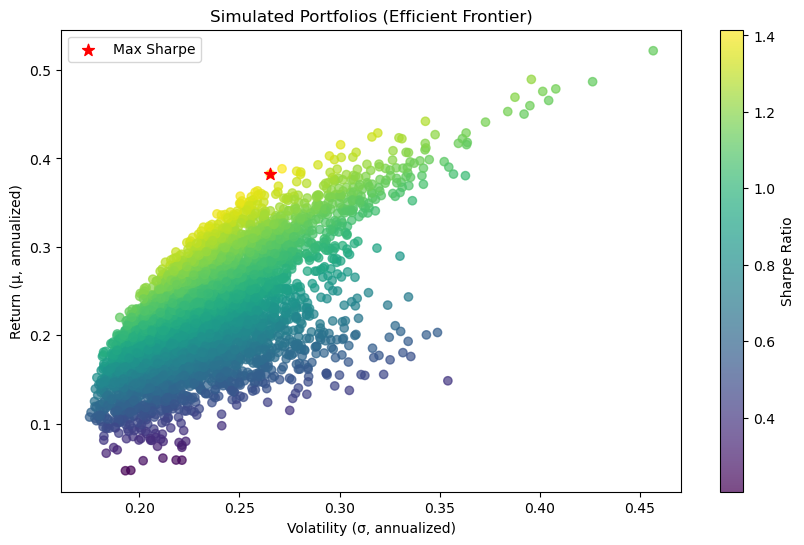

Max Sharpe Ratio: 1.4150
Expected Return: 38.23%
Volatility: 26.53%

Optimal Portfolio Weights:
------------------------------
  AAPL:   31.59%
  TSLA:   28.64%
  AMZN:   26.82%
  GOOG:    8.69%
     T:    2.12%
   MGM:    1.25%
    BA:    0.73%
   IBM:    0.15%


In [245]:
result_random = simulate_and_plot_portfolios(returns_df, rf["rf_daily"], n_portfolios=5000, seed=42)

random_fig = result_random['figure']

print(f"Max Sharpe Ratio: {result_random['max_sharpe']:.4f}")
print(f"Expected Return: {result_random['return']:.2%}")
print(f"Volatility: {result_random['volatility']:.2%}")
print("\nOptimal Portfolio Weights:")
print("-" * 30)

# Sort weights by value (descending) for better readability
sorted_weights = sorted(result_random["weights"].items(), key=lambda x: x[1], reverse=True)

for stock, weight in sorted_weights:
    print(f"{stock:>6}: {weight:>8.2%}")

In [189]:
import numpy as np
import pandas as pd
import plotly.express as px

def portfolio_backtest_interactive(returns_df, weights, benchmark_col="sp500"):
    """
    Interactive cumulative performance plot:
    - Optimal portfolio (from user-provided weights)
    - Equal-weighted portfolio
    - Benchmark (e.g., S&P 500)

    Parameters
    ----------
    returns_df : DataFrame
        Daily returns in % (columns = stocks + benchmark).
    weights : dict
        Portfolio weights {ticker: weight}.
    benchmark_col : str, default "sp500"
        Column name in returns_df to use as benchmark.
    """
    stocks = list(weights.keys())

    # --- Prepare data ---
    data = returns_df[["Date"] + stocks + [benchmark_col]].dropna().copy()
    if not pd.api.types.is_datetime64_any_dtype(data["Date"]):
        data["Date"] = pd.to_datetime(data["Date"])
    data = data.sort_values("Date").set_index("Date")

    stock_ret = data[stocks].div(100.0)
    bench_ret = data[benchmark_col].div(100.0)

    # --- Optimal portfolio ---
    w = np.array([weights[s] for s in stocks])
    port_daily = stock_ret.dot(w)
    port_cum = (1 + port_daily).cumprod()

    # --- Equal-weighted portfolio ---
    eq_daily = stock_ret.mean(axis=1)
    eq_cum = (1 + eq_daily).cumprod()

    # --- Benchmark ---
    bench_cum = (1 + bench_ret).cumprod()

    # --- Merge into one DataFrame ---
    perf_df = pd.DataFrame({
        "Optimal Portfolio": port_cum,
        "Equal-Weighted": eq_cum,
        benchmark_col.upper(): bench_cum
    }, index=stock_ret.index).reset_index().rename(columns={"index": "Date"})

    # --- Melt for Plotly ---
    melted = perf_df.melt(id_vars="Date", var_name="Series", value_name="Value")

    # --- Interactive plot ---
    fig = px.line(
        melted, x="Date", y="Value", color="Series",
        title="Cumulative Performance (Linear Scale)", template="plotly_white"
    )
    fig.update_layout(
        hovermode="x unified",
        legend_title_text="Series",
        updatemenus=[dict(
            type="dropdown", x=0.01, y=1.15, xanchor="left", yanchor="top", active=0,
            buttons=[
                dict(label="Linear", method="relayout",
                     args=[{"yaxis.type": "linear",
                            "title.text": "Cumulative Performance (Linear Scale)"}]),
                dict(label="Log", method="relayout",
                     args=[{"yaxis.type": "log",
                            "title.text": "Cumulative Performance (Log Scale)"}]),
            ],
        )]
    )
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor="rgba(0,0,0,0.05)")
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor="rgba(0,0,0,0.05)")
    fig.show()

    return perf_df


In [190]:
portfolio_backtest_interactive(returns_df, result_random["weights"])

Date  Optimal Portfolio  Equal-Weighted     SP500
0    2012-01-13           0.946701        0.975809  0.995052
1    2012-01-17           1.000692        1.001898  0.998587
2    2012-01-18           1.018867        1.016097  1.009680
3    2012-01-19           1.025641        1.021688  1.014666
4    2012-01-20           1.005765        1.010063  1.015345
...         ...                ...             ...       ...
2153 2020-08-05          20.088172        5.457684  2.568715
2154 2020-08-06          20.416506        5.566364  2.585226
2155 2020-08-07          20.017723        5.527555  2.586862
2156 2020-08-10          19.989538        5.667213  2.593956
2157 2020-08-11          19.488929        5.597353  2.573284

[2158 rows x 4 columns]

In [256]:
import warnings

def simulate_and_plot_with_frontier(returns_df, rf_daily, n_portfolios=5000, seed=42, allow_short=False, n_frontier_points=50, show=False):
    """
    Simulate random portfolios and compute the efficient frontier.
    Plot both together with the maximum Sharpe ratio portfolio.
    """
    np.random.seed(seed)
    stocks = [col for col in returns_df.columns if col not in ['Date', 'sp500']]
    returns = returns_df[stocks].dropna()
    
    # Convert % returns into decimals
    mean_daily = returns.mean() / 100
    cov_daily = returns.cov() / (100**2)
    
    # Properly align risk-free rate with returns data
    # Get the date range from returns_df and find overlapping rf data
    start_date = returns_df['Date'].iloc[1]  # Skip first row (NaN returns)
    end_date = returns_df['Date'].iloc[-1]
    
    # Filter rf_daily to match our date range and forward-fill missing values
    rf_aligned = rf_daily.loc[start_date:end_date].fillna(method='ffill')
    
    # Use the mean risk-free rate over the period for portfolio optimization
    rf_val = rf_aligned.mean()

    # --- Compute efficient frontier ---
    mu = mean_daily.values
    Sigma = cov_daily.values
    n = len(stocks)
    
    bounds = None if allow_short else [(0.0, 1.0)] * n
    
    def portfolio_vol(w): 
        return np.sqrt(w @ Sigma @ w)
    
    cons_base = [{"type": "eq", "fun": lambda w: np.sum(w) - 1}]
    
    # Target returns for frontier
    r_min, r_max = mu.min(), mu.max()
    target_returns = np.linspace(r_min, r_max, n_frontier_points)
    
    frontier_returns, frontier_vols, frontier_weights = [], [], []
    
    for rt in target_returns:
        cons = cons_base + [{"type": "eq", "fun": lambda w, rt=rt: w @ mu - rt}]
        res = minimize(portfolio_vol, np.repeat(1/n, n),
                       method="SLSQP", bounds=bounds, constraints=cons)
        if res.success:
            w = res.x
            vol = np.sqrt(w @ Sigma @ w)
            frontier_vols.append(vol * np.sqrt(252))     # annualize
            frontier_returns.append(rt * 252)            # annualize
            frontier_weights.append(dict(zip(stocks, w)))
    
    # --- Find maximum Sharpe portfolio on frontier ---
    rf_annual = rf_val * 252
    frontier_sharpe = [(r - rf_annual) / v if v > 0 else 0 
                   for r, v in zip(frontier_returns, frontier_vols)]
    max_sharpe_idx = np.argmax(frontier_sharpe)
    
    max_sharpe = frontier_sharpe[max_sharpe_idx]
    best_return = frontier_returns[max_sharpe_idx]
    best_vol = frontier_vols[max_sharpe_idx]
    best_weights = frontier_weights[max_sharpe_idx]
    
    # --- Minimum variance portfolio ---
    res_mvp = minimize(portfolio_vol, np.repeat(1/n, n),
                       method="SLSQP", bounds=bounds, constraints=cons_base)
    if res_mvp.success:
        w_mvp = res_mvp.x
        vol_mvp = np.sqrt(w_mvp @ Sigma @ w_mvp) * np.sqrt(252)
        ret_mvp = (w_mvp @ mu) * 252
    
    
    # --- Plotting ---
    result_random = simulate_and_plot_portfolios(returns_df, rf["rf_daily"], n_portfolios=5000, seed=42, show=show)
    fig = result_random['figure']
    # Plot the efficient frontier
    ax = fig.axes[0]
    ax.plot(frontier_vols, frontier_returns, 'b-', linewidth=2, label='Efficient Frontier')

    # Plot minimum variance portfolio
    if res_mvp.success:
        ax.scatter(vol_mvp, ret_mvp, c='green', s=100, marker='o', label='Min Variance')

    # Plot maximum Sharpe portfolio from frontier
    ax.scatter(best_vol, best_return, c='blue', s=100, marker='*', 
               label=f'Max Sharpe (Frontier): {max_sharpe:.3f}')

    ax.legend()
    warnings.filterwarnings('ignore')
    
    return {
        "max_sharpe": max_sharpe,
        "weights": best_weights,
        "return": best_return,
        "volatility": best_vol,
        "frontier": {
            "target_return_annual": np.array(frontier_returns),
            "volatility_annual": np.array(frontier_vols),
            "weights": np.array([list(w.values()) for w in frontier_weights])
        }
    }

Mathematical Max Sharpe Ratio: 1.4740
Mathematical Expected Return: 40.60%
Mathematical Volatility: 27.08%

 Mathematical Optimal Portfolio Weights:
------------------------------
  AMZN:   52.88%
  AAPL:   23.72%
  TSLA:   23.26%
  GOOG:    0.14%
    BA:    0.00%
     T:    0.00%
   MGM:    0.00%
   IBM:    0.00%


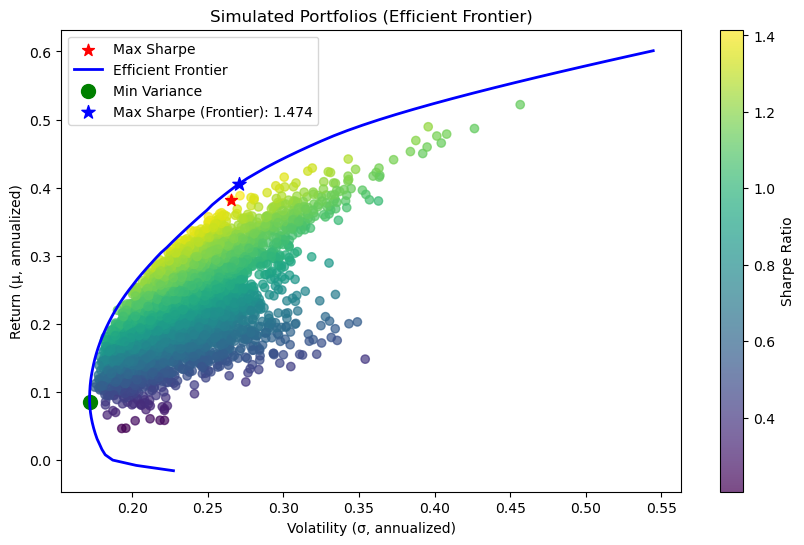

In [257]:
result = simulate_and_plot_with_frontier(
    returns_df,
    rf["rf_daily"],
    n_portfolios=5000,
    seed=42,
    allow_short=False,      # set True if you want the unconstrained (can short) frontier
    n_frontier_points=80
)

print(f"Mathematical Max Sharpe Ratio: {result['max_sharpe']:.4f}")
print(f"Mathematical Expected Return: {result['return']:.2%}")
print(f"Mathematical Volatility: {result['volatility']:.2%}")
print("\n Mathematical Optimal Portfolio Weights:")
print("-" * 30)

# Sort weights by value (descending) for better readability
sorted_weights = sorted(result["weights"].items(), key=lambda x: x[1], reverse=True)

for stock, weight in sorted_weights:
    print(f"{stock:>6}: {weight:>8.2%}")

We can clearly see that the optimal portfolio, calculated through scipy minimize, is very different to the one obtained form the random simulation. Perhaps most noteably is that we obtain 0s for half the stocks available. Moreover, we notice large increase in the percentage of the portfolio that Amazon contributes and the large decrease in the composition of Google in the optimal portfolio.

## Task 7 : Testing Portfolio Theory

In [258]:
# Create a copy of returns_df with data only until the end of 2016
returns_df_2016 = returns_df[returns_df['Date'] <= '2016-12-31'].copy()

# Create a copy of returns_df with data only until the end of 2020
returns_df_2020 = returns_df[returns_df['Date'] >=  '2016-12-31'].copy()

In [260]:
def train_weights_simulated(returns_df, rf_daily, n_portfolios=5000, seed=42, show=True):
    """
    Simulate random portfolios, compute return, variance, and Sharpe ratio for each.
    Plot the efficient frontier and highlight the max Sharpe portfolio.
    """
    np.random.seed(seed)
    stocks = [col for col in returns_df.columns if col not in ['Date', 'sp500']]
    returns = returns_df[stocks].dropna()
    
    # Convert % returns into decimals
    mean_daily = returns.mean() / 100
    cov_daily = returns.cov() / (100**2)
    
    # Properly align risk-free rate with returns data
    # Get the date range from returns_df and find overlapping rf data
    start_date = returns_df['Date'].iloc[1]  # Skip first row (NaN returns)
    end_date = returns_df['Date'].iloc[-1]
    
    # Filter rf_daily to match our date range and forward-fill missing values
    rf_aligned = rf_daily.loc[start_date:end_date].fillna(method='ffill')
    
    # Use the mean risk-free rate over the period for portfolio optimization
    rf_val = rf_aligned.mean()
    
    results = {"returns": [], "volatility": [], "sharpe": [], "weights": []}
    
    for _ in range(n_portfolios):
        weights = np.random.dirichlet(np.ones(len(stocks)))
        port_return = np.dot(weights, mean_daily)
        port_var = np.dot(weights, np.dot(cov_daily, weights))
        port_std = np.sqrt(port_var)
        
        sharpe = ((port_return - rf_val) / port_std) * np.sqrt(252) if port_std > 0 else 0
        
        results["returns"].append(port_return * 252)   # annualized return
        results["volatility"].append(port_std * np.sqrt(252))  # annualized volatility
        results["sharpe"].append(sharpe)
        results["weights"].append(weights)
    
    # Find max Sharpe portfolio
    idx_max = np.argmax(results["sharpe"])
    max_sharpe = results["sharpe"][idx_max]
    best_return = results["returns"][idx_max]
    best_vol = results["volatility"][idx_max]
    best_weights = results["weights"][idx_max]

    fig,ax = plt.subplots(figsize=(10,6))
    scatter = ax.scatter(results["volatility"], results["returns"],
                          c=results["sharpe"], cmap="viridis", alpha=0.7)
    fig.colorbar(scatter, label="Sharpe Ratio")
    ax.scatter(best_vol, best_return, c="red", s=80, marker="*", label="Max Sharpe")

    ax.set_xlabel("Volatility (σ, annualized)")
    ax.set_ylabel("Return (μ, annualized)")
    ax.set_title("Simulated Portfolios (Efficient Frontier)")
    ax.legend()
    if show:
        plt.show()
    
    return {
        "sharpe": results["sharpe"],
        "max_sharpe": max_sharpe,
        "weights": dict(zip(stocks, best_weights)),
        "return": best_return,
        "volatility": best_vol,
        'figure': fig
    }

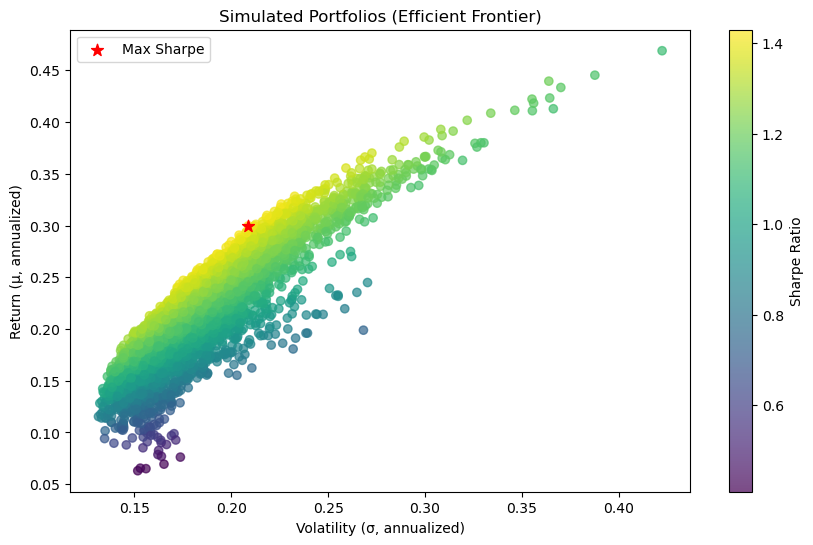

Max Sharpe Ratio: 1.4302
Expected Return: 29.98%
Volatility: 20.88%

Optimal Portfolio Weights:
------------------------------
  AMZN:   31.11%
    BA:   20.93%
  TSLA:   20.30%
  AAPL:   12.14%
  GOOG:    9.33%
   MGM:    3.77%
     T:    2.13%
   IBM:    0.30%


In [261]:
result_random = train_weights_simulated(returns_df_2016, rf["rf_daily"], n_portfolios=5000, seed=42)

random_fig = result_random['figure']

print(f"Max Sharpe Ratio: {result_random['max_sharpe']:.4f}")
print(f"Expected Return: {result_random['return']:.2%}")
print(f"Volatility: {result_random['volatility']:.2%}")
print("\nOptimal Portfolio Weights:")
print("-" * 30)

# Sort weights by value (descending) for better readability
sorted_weights = sorted(result_random["weights"].items(), key=lambda x: x[1], reverse=True)

for stock, weight in sorted_weights:
    print(f"{stock:>6}: {weight:>8.2%}")

In [271]:
def compare_portfolio_performance(returns_df_2016, returns_df_2020, weights):
    """
    Compare portfolio performance over two different time periods.
    Shows cumulative performance starting with $1 investment.
    """
    stocks = list(weights.keys())
    
    # Prepare 2016 data (training period)
    train_data = returns_df_2016[["Date"] + stocks].dropna().copy()
    train_data = train_data.sort_values("Date")
    
    # Prepare 2020 data (test period)
    test_data = returns_df_2020[["Date"] + stocks].dropna().copy()
    test_data = test_data.sort_values("Date")
    
    # Convert returns from % to decimals
    train_returns = train_data[stocks] / 100
    test_returns = test_data[stocks] / 100
    
    # Calculate portfolio returns
    w = np.array([weights[s] for s in stocks])
    train_portfolio_returns = train_returns.dot(w)
    test_portfolio_returns = test_returns.dot(w)
    
    # Calculate cumulative performance (starting with $1)
    train_cumulative = (1 + train_portfolio_returns).cumprod()
    test_cumulative = (1 + test_portfolio_returns).cumprod()
    
    # FIXED: Align dates with cumulative returns properly
    # Since we have returns for all rows after dropna(), use corresponding dates
    train_dates = train_data["Date"].iloc[:len(train_cumulative)]
    test_dates = test_data["Date"].iloc[:len(test_cumulative)]
    
    # Plot both periods
    plt.figure(figsize=(12, 8))
    plt.plot(train_dates, train_cumulative, 
             label="Portfolio Performance (2012-2016)", linewidth=2, color='blue')
    plt.plot(test_dates, test_cumulative, 
             label="Portfolio Performance (2017-2020)", linewidth=2, color='red')
    
    plt.title("Portfolio Performance Comparison: Training vs Test Period")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Value ($1 initial investment)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    train_final_value = train_cumulative.iloc[-1]
    test_final_value = test_cumulative.iloc[-1]
    
    train_days = len(train_portfolio_returns)
    test_days = len(test_portfolio_returns)
    
    train_total_return = train_final_value - 1
    test_total_return = test_final_value - 1
    
    train_annualized = (train_final_value)**(252/train_days) - 1
    test_annualized = (test_final_value)**(252/test_days) - 1
    
    print("=" * 60)
    print("PORTFOLIO PERFORMANCE COMPARISON")
    print("=" * 60)
    print(f"Training Period (2012-2016):")
    print(f"  Final Value: ${train_final_value:.2f}")
    print(f"  Total Return: {train_total_return:.2%}")
    print(f"  Annualized Return: {train_annualized:.2%}")
    print()
    print(f"Test Period (2017-2020):")
    print(f"  Final Value: ${test_final_value:.2f}")
    print(f"  Total Return: {test_total_return:.2%}")
    print(f"  Annualized Return: {test_annualized:.2%}")
    
    # Calculate expected vs realized volatility
    train_volatility = train_portfolio_returns.std() * np.sqrt(252)
    test_volatility = test_portfolio_returns.std() * np.sqrt(252)
    
    print()
    print("VOLATILITY COMPARISON:")
    print("-" * 30)
    print(f"Expected Volatility (from training): {train_volatility:.2%}")
    print(f"Realized Volatility (test period): {test_volatility:.2%}")
    print(f"Volatility Difference: {test_volatility - train_volatility:.2%}")
    
    # Plot expected vs realized volatility
    plt.figure(figsize=(8, 6))
    volatilities = [train_volatility, test_volatility]
    labels = ['Expected\n(2012-2016)', 'Realized\n(2017-2020)']
    colors = ['blue', 'red']
    
    bars = plt.bar(labels, volatilities, color=colors, alpha=0.7, edgecolor='black')
    plt.title('Expected vs Realized Portfolio Volatility')
    plt.ylabel('Annualized Volatility')
    plt.ylim(0, max(volatilities) * 1.2)
    
    # Add value labels on bars
    for bar, vol in zip(bars, volatilities):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(volatilities)*0.01,
                f'{vol:.2%}', ha='center', va='bottom', fontweight='bold')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

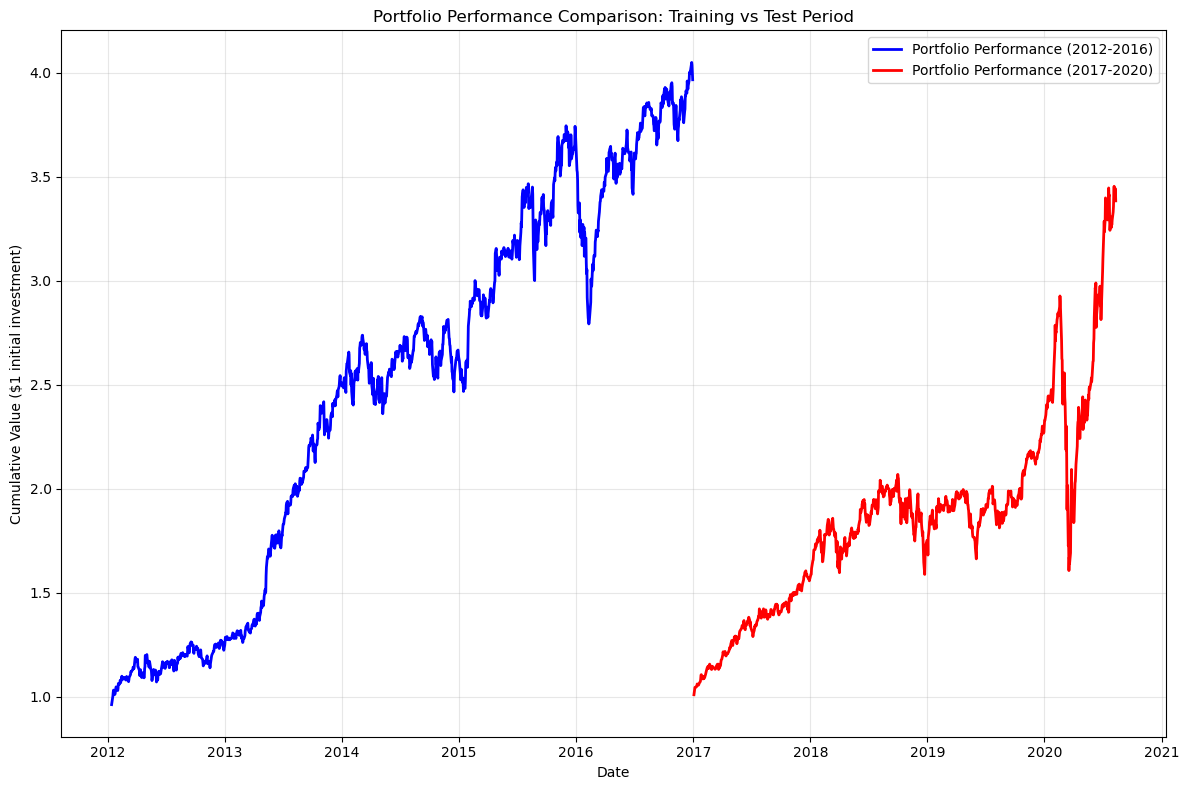

PORTFOLIO PERFORMANCE COMPARISON
Training Period (2012-2016):
  Final Value: $3.97
  Total Return: 296.75%
  Annualized Return: 32.03%

Test Period (2017-2020):
  Final Value: $3.39
  Total Return: 238.50%
  Annualized Return: 40.27%

VOLATILITY COMPARISON:
------------------------------
Expected Volatility (from training): 20.88%
Realized Volatility (test period): 29.55%
Volatility Difference: 8.66%


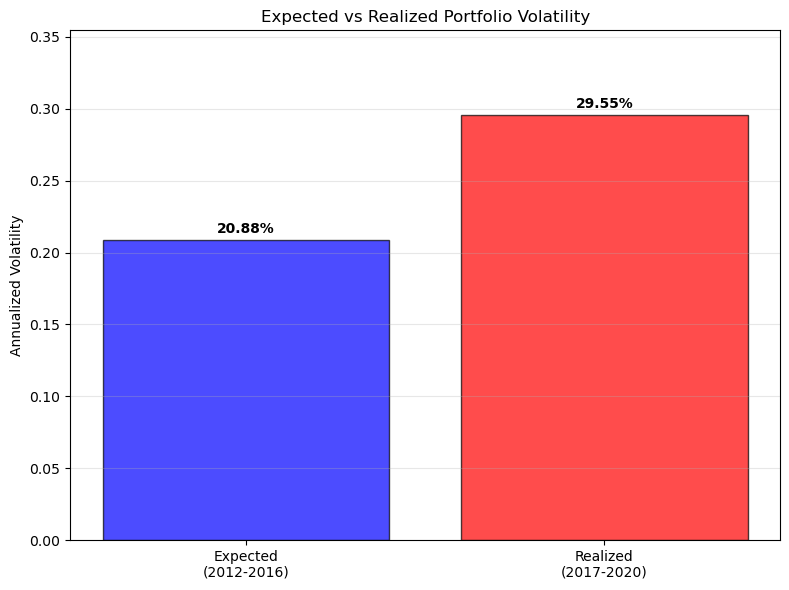

In [272]:
compare_portfolio_performance(returns_df_2016, returns_df_2020, result_random["weights"])